10 вариант. Ромашко Дарья Владимировна ИУ5-64Б.
# РК1
Задание:
Задача 2. Набор данных https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Доп. требование: для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [25]:
wine=load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [26]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

В этом датасете нет пропусков, поэтому добавим их

In [27]:
# создаем случайные пропущенные значения в столбце 'alcohol'
random_indices = np.random.randint(0, len(df), size=5)
df.loc[random_indices, 'alcohol'] = np.nan

In [28]:
df.isnull().sum()

alcohol                         5
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

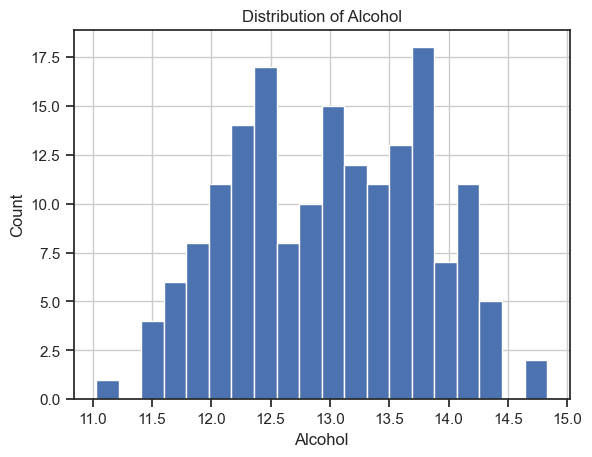

In [29]:
df['alcohol'].hist(bins=20)
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

Используем  метод заполнения средним, поскольку пропущенных значений немного, и распределение близко к нормальному.

In [30]:
mean_alcohol = df['alcohol'].mean()
df['alcohol'] = df['alcohol'].fillna(mean_alcohol)

В данном датасете отсутствуют категориальные признаки, поэтому создадим color_intensity_category на основе количественного признака color_intensity

In [31]:
df['color_intensity_category'] = pd.cut(df['color_intensity'], bins=[0, 4, 8, 12, 16, 20], labels=['Very Light', 'Light', 'Medium', 'Dark', 'Very Dark'])

print(df['color_intensity_category'].value_counts())

Light         86
Very Light    71
Medium        20
Dark           1
Very Dark      0
Name: color_intensity_category, dtype: int64


In [32]:
# создаем случайные пропущенные значения в столбце 'color_intensity_category'
random_indices = np.random.randint(0, len(df), size=10)
df.loc[random_indices, 'color_intensity_category'] = np.nan

In [33]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
color_intensity_category        9
dtype: int64

In [34]:
# заполним пропуски модой
df['color_intensity_category'].fillna(df['color_intensity_category'].mode()[0], inplace=True)
print(df['color_intensity_category'].value_counts())

Light         91
Very Light    67
Medium        19
Dark           1
Very Dark      0
Name: color_intensity_category, dtype: int64


In [35]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
color_intensity_category        0
dtype: int64

Построим violin plot для колонки "alcohol"

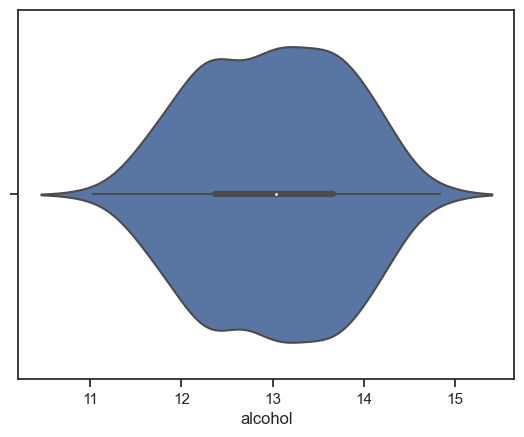

In [36]:
sns.violinplot(x=df['alcohol'])
plt.xlabel('alcohol')
plt.show()